In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [10]:
X,y = make_blobs(n_samples=1000,centers=3,cluster_std=0.60,random_state=0)

In [8]:
X

array([[ 2.23421043e+00,  1.69349520e+00],
       [-1.05510724e+00,  2.63803080e+00],
       [ 1.08272576e+00,  4.06271877e+00],
       [-2.60159431e+00,  7.22195591e+00],
       [ 1.60841463e+00,  4.01800537e-01],
       [ 9.82570091e-01,  5.37530962e+00],
       [-1.71343572e+00,  2.97632236e+00],
       [ 4.43598630e-01,  3.11530945e+00],
       [ 1.71444449e+00,  5.02521524e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [ 5.95676822e-01,  4.08614263e+00],
       [ 2.43040639e+00, -6.35709334e-02],
       [-2.10047101e+00,  2.71029320e+00],
       [-2.45138222e+00,  2.95583946e+00],
       [ 3.20903274e+00,  1.78597253e+00],
       [ 1.86922139e+00,  5.44132083e+00],
       [-1.46707190e+00,  7.92948233e+00],
       [-1.25766504e+00,  7.93201692e+00],
       [-1.40889590e+00,  7.15865322e+00],
       [ 1.53853211e+00,  2.04370263e+00],
       [-1.68001841e+00,  7.34766422e+00],
       [-8.35505074e-01,  3.56565342e+00],
       [ 1.84287117e+00,  7.26928839e-02],
       [-1.

In [9]:
y

array([1, 2, 0, 3, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 3, 3, 3, 1, 3, 2,
       1, 2, 1, 1, 3, 1, 1, 0, 3, 0, 2, 1, 2, 0, 2, 0, 0, 3, 3, 3, 3, 0,
       1, 2, 0, 3, 3, 0, 3, 2, 2, 3, 0, 3, 2, 1, 0, 1, 3, 0, 1, 0, 3, 0,
       1, 3, 2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 1, 1, 3, 0, 1, 2, 2, 0, 0, 1,
       2, 2, 3, 3, 3, 0, 0, 1, 2, 3, 0, 0, 3, 1, 1, 3, 3, 2, 0, 1, 1, 0,
       3, 2, 2, 1, 1, 0, 2, 2, 3, 0, 3, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1,
       2, 3, 3, 2, 3, 3, 1, 3, 1, 2, 1, 1, 2, 1, 0, 1, 2, 3, 3, 3, 0, 2,
       1, 0, 3, 2, 3, 1, 3, 1, 1, 2, 2, 3, 0, 1, 1, 2, 1, 0, 2, 3, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 0, 2, 2, 3, 0, 3, 1, 1, 0, 3, 2, 2, 2, 0,
       3, 1])

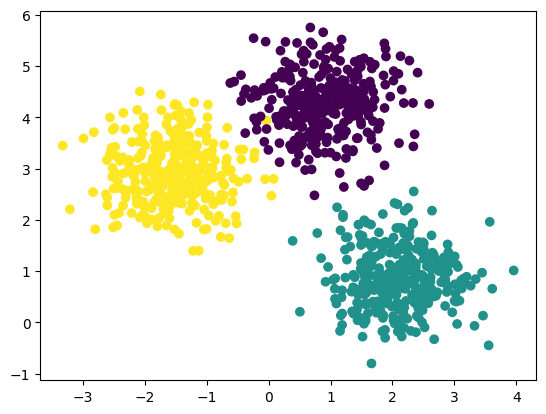

In [12]:
plt.scatter(X[:,0],X[:,1],c=y)

In [13]:
## Standardization-- feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [21]:
## Elbow Method to select k value
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [22]:
wcss

[1599.9999999999995,
 646.8724455159938,
 229.05343376615008,
 200.74172609308388,
 173.03303396732326,
 147.1382662691354,
 137.50306812487702,
 116.0763686647008,
 99.16859370639287,
 92.23102439781199]

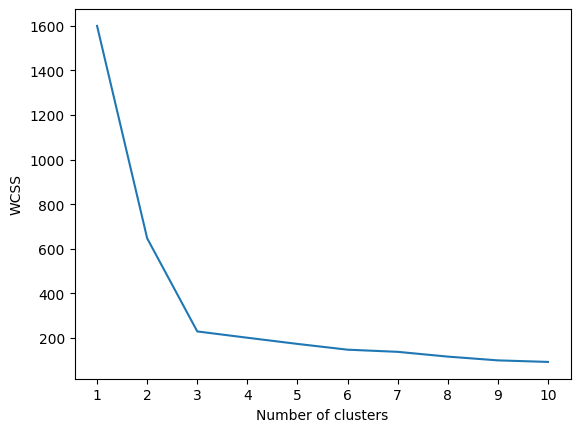

In [24]:
## plot elbow graph
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [25]:
kmeans = KMeans(n_clusters=3,init="k-means++")

In [26]:
kmeans.fit_predict(X_train_scaled)

array([0, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, 2,
       0, 0, 1, 2, 2, 1, 0, 2, 0, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2,
       0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2,
       2, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0,
       0, 0, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1, 2,
       2, 2, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1,
       0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0, 2, 2,
       0, 2, 2, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 2, 1,
       2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0,
       1, 0, 1, 2, 0, 2, 0, 1, 2, 1, 1, 0, 2, 2, 2,

In [27]:
y_pred = kmeans.predict(X_test_scaled)

In [28]:
y_pred

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2,
       0, 0, 2, 0, 2, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 1, 0, 0, 1, 1, 2, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2,
       0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0,
       0, 2, 2, 0, 2, 1, 2, 2, 0, 1, 2, 0, 2, 1, 0, 0, 0, 1, 2, 2, 0, 1,
       0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 2, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 1, 0, 2, 0,
       0, 2])

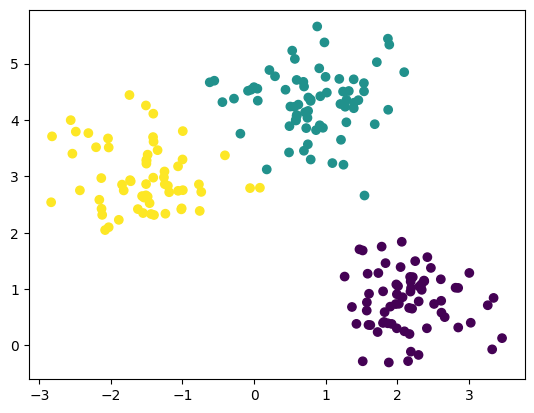

In [29]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [ ]:
## Validating the k value
## KneeLocator
## Shihoutee Scoring

In [32]:
## KneeLocator
!pip install kneed


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from kneed import KneeLocator

In [35]:
k1 = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [36]:
k1.all_elbows

{3}

In [37]:
## Shihoutee Scoring
from sklearn.metrics import silhouette_score

In [38]:
shilhouette_coefficient = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled,kmeans.labels_)
    shilhouette_coefficient.append(score)

In [39]:
shilhouette_coefficient

[0.568126558277918,
 0.6474796878347915,
 0.5182895439436869,
 0.40312442285293687,
 0.44044350897248,
 0.32166760971090613,
 0.34508475763061014,
 0.345612761974033,
 0.3373091126602301]

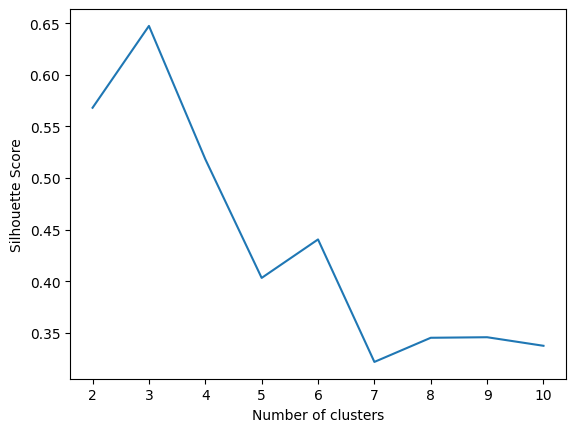

In [45]:
## Ploting silhouette scores
plt.plot(range(2,11),shilhouette_coefficient)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()